In [204]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import ydata_profiling
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
data = pd.read_csv(r'C:\Users\SunInternet.ir\Desktop\data\housing.csv')

In [59]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [60]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [61]:
data.shape

(20640, 10)

In [62]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [64]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [65]:
numeric_df = data.select_dtypes(include=['number'])

In [66]:
numeric_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [67]:
numeric_df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

THis is the NAN data

In [68]:
df = numeric_df

print(f"DataFrame orginal: {df} ")


imputer_mean = SimpleImputer(strategy='median')
df_filled_mean = pd.DataFrame(imputer_mean.fit_transform(df), columns=df.columns)
print(df_filled_mean)

DataFrame orginal:        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  m

In [69]:
df_filled_mean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


whiten dataset

In [70]:

df_standardized = (df_filled_mean - df_filled_mean.mean()) / df_filled_mean.std()

pca = PCA(whiten=True)
df_whitened = pca.fit_transform(df_standardized)

In [71]:
df_whitened

array([[-0.99537362,  0.39810543,  2.75877692, ..., -0.52952829,
         1.06043233, -0.65434565],
       [ 1.53018771,  0.94665246,  2.21372449, ..., -0.71574607,
        -0.68676878,  1.82376857],
       [-0.95536654,  0.61671682,  2.05136833, ..., -0.3001096 ,
         0.247818  , -0.51031001],
       ...,
       [-0.25818152,  1.52678492, -0.78920481, ...,  1.09696002,
         1.77155833,  0.58120457],
       [-0.46744185,  1.51210157, -0.75263415, ...,  0.91280733,
         1.58503153,  0.40352131],
       [ 0.04078788,  1.52553896, -0.63900127, ...,  0.67074633,
         1.86813105,  0.06343949]])

Normal dataset

In [72]:
standard_scaler = StandardScaler()

df_normalized_array  = standard_scaler.fit_transform(df_whitened)


CORR

In [73]:
coor_matrix = numeric_df.corr()

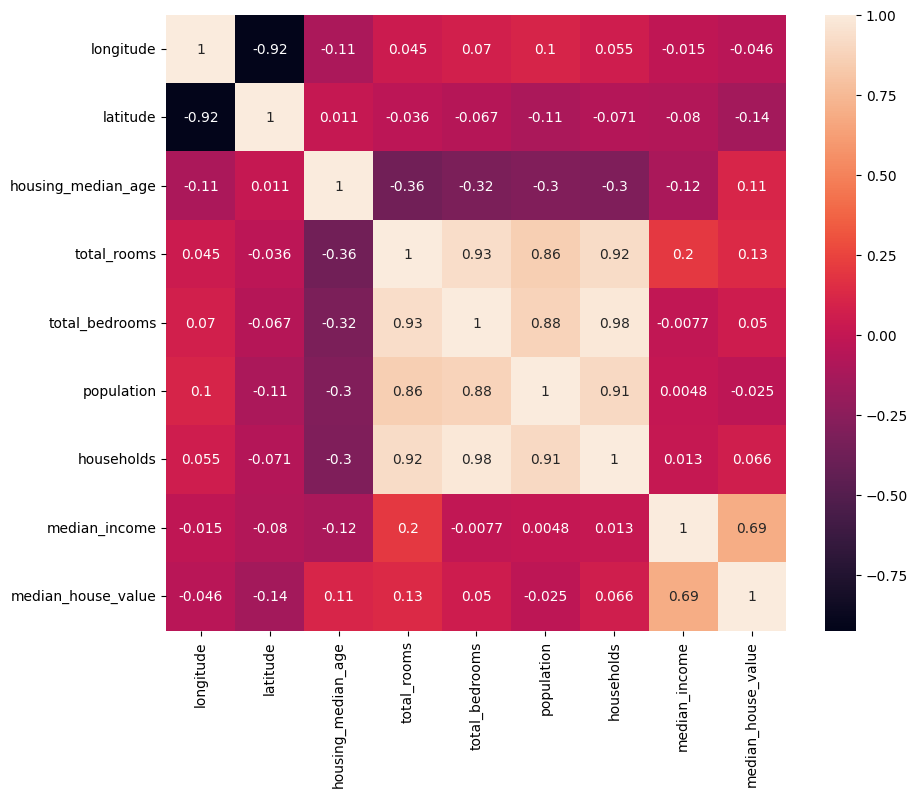

In [74]:
numeric_df = numeric_df
corr_matrix = numeric_df.corr()
    
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

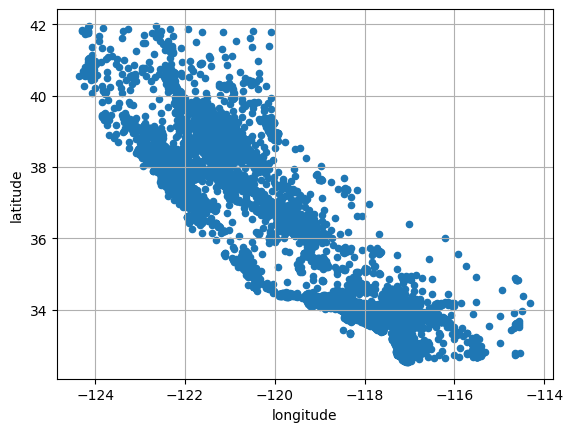

In [75]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

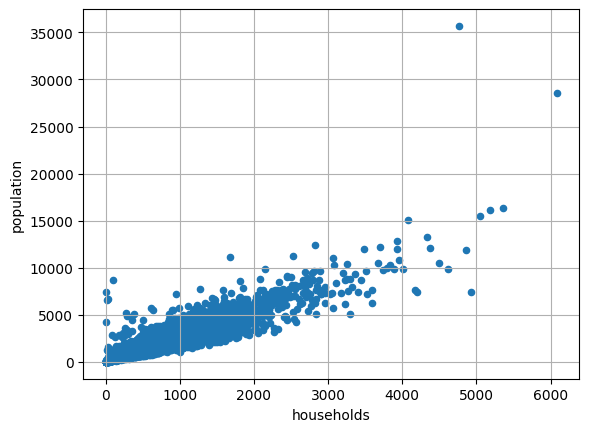

In [76]:
df.plot(kind="scatter", x="households", y="population", grid=True)
plt.show()

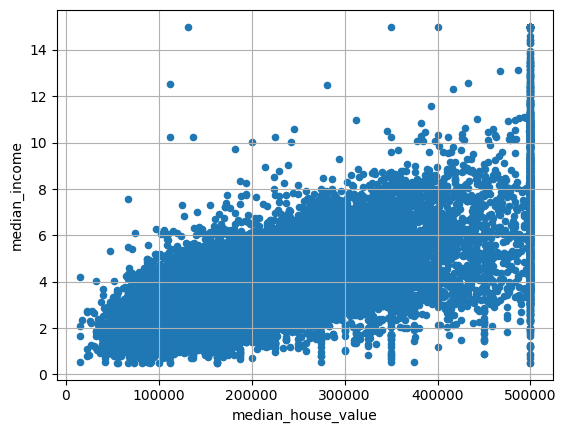

In [77]:

df.plot(kind="scatter", x="median_house_value", y="median_income", grid=True)
plt.show()

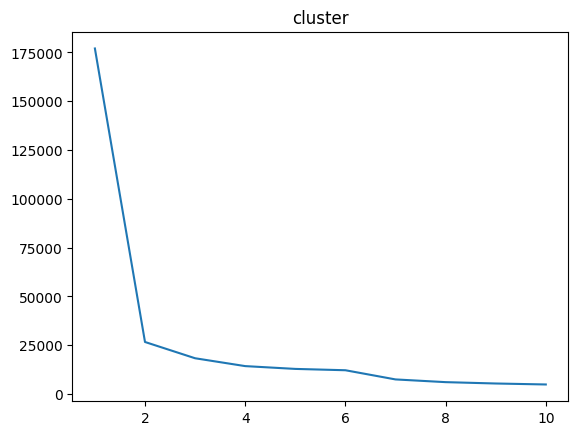

In [78]:
from sklearn.cluster import KMeans

data = df[['longitude','latitude' ]]
list1 = []


for i in range(1,11):
    kamen = KMeans(n_clusters=i)
    kamen.fit(data)
    list1.append(kamen.inertia_)
    
    
plt.plot(range(1,11),list1)
plt.title('cluster')
plt.show()
    


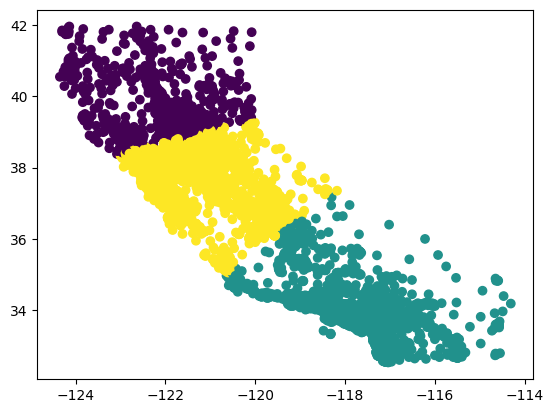

In [79]:

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['longitude','latitude' ]])

cluster_labels = kmeans.labels_


plt.scatter(df['longitude'], df['latitude'], c=cluster_labels, cmap='viridis')
plt.show()

In [80]:
df_normalized_array

array([[-0.99539774,  0.39811507,  2.75884375, ..., -0.52954112,
         1.06045802, -0.6543615 ],
       [ 1.53022478,  0.94667539,  2.21377812, ..., -0.71576341,
        -0.68678541,  1.82381275],
       [-0.95538969,  0.61673176,  2.05141803, ..., -0.30011687,
         0.247824  , -0.51032237],
       ...,
       [-0.25818777,  1.52682191, -0.78922393, ...,  1.0969866 ,
         1.77160125,  0.58121865],
       [-0.46745317,  1.5121382 , -0.75265239, ...,  0.91282945,
         1.58506992,  0.40353109],
       [ 0.04078887,  1.52557592, -0.63901675, ...,  0.67076258,
         1.8681763 ,  0.06344103]])

In [81]:
df_normalized = pd.DataFrame(df_normalized_array, columns=df.columns)

In [82]:
df_normalized = pd.DataFrame(df_normalized_array, columns=df.columns)

X = df_normalized[['longitude', ]]
Y = df_normalized['latitude']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [84]:
print(f'this is the mse: {mse}')
print(f'this is the r2 {r2}')

this is the mse: 1.0125655952155193
this is the r2 -8.429872237458724e-05


Use DT classification

In [129]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [130]:
# ساخت مدل KNN
knn = KNeighborsClassifier(n_neighbors=3)

# آموزش مدل
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_resp

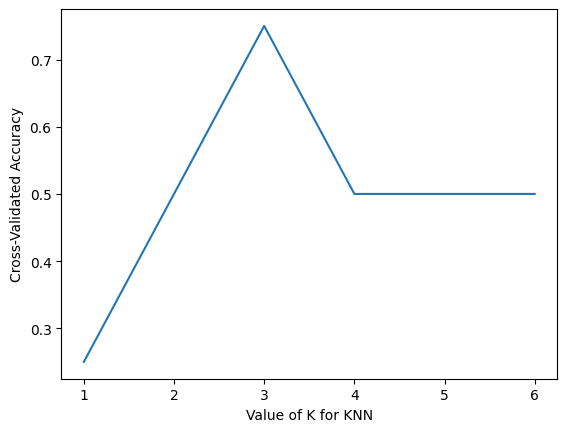

In [134]:
k_range = range(1, 9)  # در این داده‌های ساختگی ما حداکثر 8 نمونه داریم
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=4, scoring='accuracy')  # استفاده از 4-fold cross-validation
    k_scores.append(scores.mean())

# رسم نمودار دقت برای k های مختلف
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Linear Regression MSE: 0.653699513717002, R2: 0.4203137289819706
Polynomial Regression MSE: 0.6358406072820805, R2: 0.4361506122264659


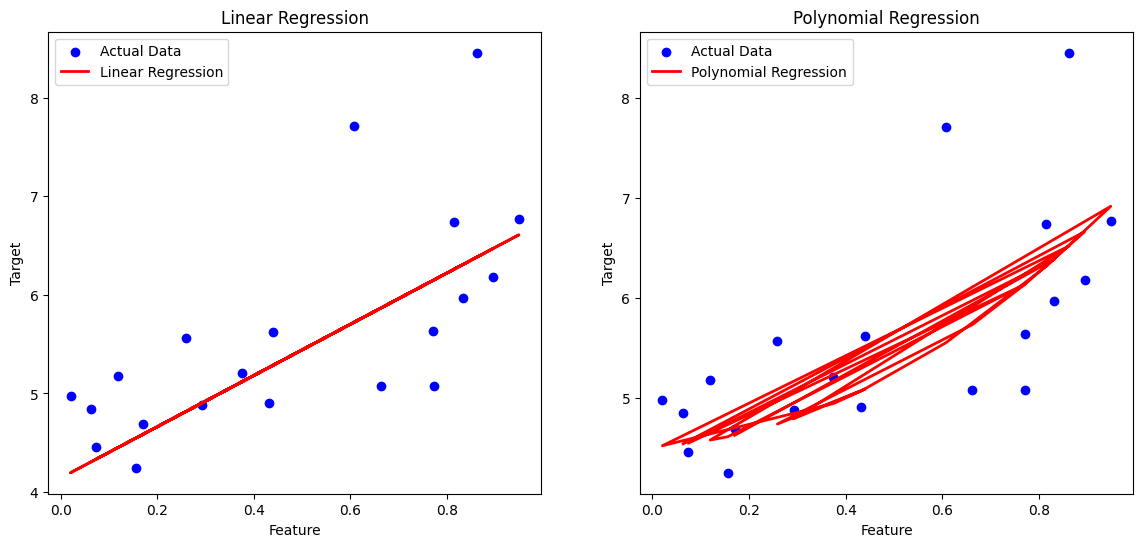

In [148]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ساخت داده‌های ساختگی ژنتیکی
np.random.seed(42)
X = np.random.rand(100, 1)  # 100 نمونه با یک ویژگی
y = 4 + 3 * X + np.random.randn(100, 1)  # تابع خطی با نویز

# تقسیم داده‌ها به آموزشی و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# رگرسیون خطی
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# ارزیابی رگرسیون خطی
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f'Linear Regression MSE: {mse_lin}, R2: {r2_lin}')

# رگرسیون چندجمله‌ای با درجه 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

X_test_poly = poly_features.transform(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)

# ارزیابی رگرسیون چندجمله‌ای
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression MSE: {mse_poly}, R2: {r2_poly}')

# رسم نمودارها
plt.figure(figsize=(14, 6))

# رگرسیون خطی
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_lin, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# رگرسیون چندجمله‌ای
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_poly, color='red', linewidth=2, label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.show()

In [152]:
import pandas as pd
from random import randint as rnd
from random import shuffle
import numpy as np

number_city = 4
population_size = 4
epoch = 1

def read_dataset(file_path):
    df = pd.read_csv(file_path)
    cities = df[['latitude', 'longitude']].values.tolist()
    return cities

def init_population(n):
    population_list = []
    for _ in range(population_size):
        path = list(range(n))
        shuffle(path)
        population_list.append(path)
    return population_list

def calculate_distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def total_distance(path, cities):
    distance = 0
    for i in range(len(path)):
        distance += calculate_distance(cities[path[i]], cities[path[(i + 1) % len(path)]])
    return distance

def cross_over(population, cities):
    new_population = []
    for i in range(len(population)):
        parent1 = population[i]
        parent2 = population[(i + 1) % len(population)]
        cut = len(parent1) // 2
        child = parent1[:cut] + [city for city in parent2 if city not in parent1[:cut]]
        new_population.append(child)
    return new_population

def genetic_algorithm(cities):
    current_population = init_population(len(cities))
    for _ in range(epoch):
        current_population = cross_over(current_population, cities)
        current_population.sort(key=lambda path: total_distance(path, cities))
    return current_population[0]

if __name__ == '__main__':
    file_path = r'C:\Users\SunInternet.ir\Desktop\data\housing.csv'
    cities = read_dataset(file_path)
    best_path = genetic_algorithm(cities)
    best_distance = total_distance(best_path, cities)
    
    print("Best path:", best_path)
    print("Best path (city names):", [cities[i] for i in best_path])
    print("Total distance of best path:", best_distance)

Best path: [9232, 4543, 12970, 16294, 15870, 17549, 13935, 7332, 4867, 9138, 15206, 19603, 1693, 17906, 15283, 16773, 17332, 7301, 17916, 11933, 16343, 10713, 13159, 7821, 11285, 4136, 14623, 3481, 7151, 14370, 12938, 113, 13352, 16118, 6228, 5198, 20141, 10990, 11234, 20305, 9942, 8439, 12066, 5175, 16873, 4613, 4190, 3432, 8471, 3246, 18903, 19738, 17310, 8547, 17673, 2680, 17086, 4791, 8676, 84, 4943, 995, 7520, 13715, 2602, 18681, 6930, 7188, 20133, 9896, 15795, 14177, 14265, 13680, 18485, 12104, 19908, 4143, 16392, 9604, 8715, 15095, 17149, 6440, 13764, 10005, 7387, 9291, 7136, 11070, 7093, 13906, 2190, 17797, 6591, 9238, 15142, 14288, 14603, 2834, 3987, 15161, 7392, 2226, 17059, 10994, 5334, 11231, 5630, 9383, 12852, 18466, 7681, 8320, 8089, 2535, 15560, 15664, 2743, 10605, 5030, 760, 6669, 18331, 18900, 5495, 13937, 4001, 863, 13534, 5100, 1243, 10862, 12676, 12336, 15825, 10431, 16909, 17462, 18705, 8272, 18317, 3691, 6954, 10386, 4688, 12514, 20520, 2736, 4002, 16330, 9725, 11

In [159]:
X_path = best_path
Y_path = cities

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_path, Y_path, test_size=0.2, random_state=42)

In [193]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [194]:
X_train_new = pd.DataFrame(X_train)

In [195]:
X_test_new = pd.DataFrame(X_test)

In [196]:
model_path = LinearRegression()
X_train_new = pd.DataFrame(X_train)
y_train_new = pd.DataFrame(y_train)
model_path.fit(X_train_new,y_train_new)

LinearRegression()

In [197]:
X_test_new = pd.DataFrame(X_test)
y_pred_lin = lin_reg.predict(X_test_new)

In [198]:
y_pred_lin

array([[53021.74543314],
       [ 2444.27274207],
       [11391.41544748],
       ...,
       [32921.20845192],
       [ 2787.29418764],
       [38022.35313119]])

In [208]:
documents = data['latitude'].astype(str).tolist()


In [211]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

In [213]:
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [215]:
print("Feature Names:")
print(vectorizer.get_feature_names_out())


Feature Names:
['01' '02' '03' '04' '05' '06' '07' '08' '09' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29' '31'
 '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45'
 '46' '47' '48' '49' '51' '52' '53' '54' '55' '56' '57' '58' '59' '61'
 '62' '63' '64' '65' '66' '67' '68' '69' '71' '72' '73' '74' '75' '76'
 '77' '78' '79' '81' '82' '83' '84' '85' '86' '87' '88' '89' '91' '92'
 '93' '94' '95' '96' '97' '98' '99']


In [216]:
print("TF-IDF Matrix Shape:")
print(tfidf_matrix.shape)

TF-IDF Matrix Shape:
(20640, 91)
